<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_09_Data_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorDataset

In [1]:
# Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

We will create our own data

In [2]:
# Create a dataset in Numpy
nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations, nFeatures)

data.shape

(100, 20)

In [3]:
# Convert the data into pytorch tensor
dataT = torch.tensor(data)

# Print out some information
print("Numpy Data")
print(type(data))
print()
print(data.shape) # numpy -> .shape
print()
print(data.dtype) # The 

Numpy Data
<class 'numpy.ndarray'>

(100, 20)

float64


In [4]:
print("Tensor Data")
print(type(dataT))
print()
print(dataT.size()) # torch -> size() dataT.shape also works
print()
print(dataT.shape)
print()
print(dataT.dtype)

Tensor Data
<class 'torch.Tensor'>

torch.Size([100, 20])

torch.Size([100, 20])

torch.float64


In [5]:
# Converting datatypes
dataT2 = torch.tensor(data).float()
print(dataT2.dtype)

torch.float32


In [6]:
# .long() works for integers, like we have always used to create labels
dataT3 = torch.tensor(data).long()
print(dataT3.dtype)

torch.int64


In [7]:
# Orignal numpy Data
data

array([[-0.30934611, -1.63534088,  1.94578829, ...,  0.53822216,
        -1.4183708 , -0.63250549],
       [-1.77443406, -1.61449976, -2.08322206, ...,  0.69257092,
        -0.34346085,  1.62524099],
       [-0.73448207, -0.56078901,  0.61561604, ...,  1.02658447,
        -0.11347027, -1.04180948],
       ...,
       [ 0.09331416,  1.64496127, -0.64144861, ..., -0.59951025,
        -0.2740824 , -0.94202374],
       [ 0.73705482,  0.15010436,  1.34845741, ..., -0.65514898,
        -0.4476351 ,  0.12567925],
       [ 0.8945009 , -0.35430736,  0.23806461, ..., -0.37311194,
         0.41634703, -0.11715895]])

In [8]:
# Pytorch Tensor
dataT2

tensor([[-0.3093, -1.6353,  1.9458,  ...,  0.5382, -1.4184, -0.6325],
        [-1.7744, -1.6145, -2.0832,  ...,  0.6926, -0.3435,  1.6252],
        [-0.7345, -0.5608,  0.6156,  ...,  1.0266, -0.1135, -1.0418],
        ...,
        [ 0.0933,  1.6450, -0.6414,  ..., -0.5995, -0.2741, -0.9420],
        [ 0.7371,  0.1501,  1.3485,  ..., -0.6551, -0.4476,  0.1257],
        [ 0.8945, -0.3543,  0.2381,  ..., -0.3731,  0.4163, -0.1172]])

In [9]:
# Integer Tensor: floor value is always taken
dataT3

tensor([[ 0, -1,  1,  ...,  0, -1,  0],
        [-1, -1, -2,  ...,  0,  0,  1],
        [ 0,  0,  0,  ...,  1,  0, -1],
        ...,
        [ 0,  1,  0,  ...,  0,  0,  0],
        [ 0,  0,  1,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0]])

In [10]:
# Convert the tensors into PyTorch Datasets
# dataset = TensorDataset(data) # This is not a tensor, so cannot be converted
# We need tensor for that
dataset = TensorDataset(dataT)
# Dataset is a two-element tuple comprising of data and labels
# Internal representation changes
dataset.tensors

(tensor([[-0.3093, -1.6353,  1.9458,  ...,  0.5382, -1.4184, -0.6325],
         [-1.7744, -1.6145, -2.0832,  ...,  0.6926, -0.3435,  1.6252],
         [-0.7345, -0.5608,  0.6156,  ...,  1.0266, -0.1135, -1.0418],
         ...,
         [ 0.0933,  1.6450, -0.6414,  ..., -0.5995, -0.2741, -0.9420],
         [ 0.7371,  0.1501,  1.3485,  ..., -0.6551, -0.4476,  0.1257],
         [ 0.8945, -0.3543,  0.2381,  ..., -0.3731,  0.4163, -0.1172]],
        dtype=torch.float64),)

In [11]:
# Single element tuple
len(dataset.tensors)

1

In [12]:
# We can access all the numbers by indexing on zero element of the tuple
dataset.tensors[0]

tensor([[-0.3093, -1.6353,  1.9458,  ...,  0.5382, -1.4184, -0.6325],
        [-1.7744, -1.6145, -2.0832,  ...,  0.6926, -0.3435,  1.6252],
        [-0.7345, -0.5608,  0.6156,  ...,  1.0266, -0.1135, -1.0418],
        ...,
        [ 0.0933,  1.6450, -0.6414,  ..., -0.5995, -0.2741, -0.9420],
        [ 0.7371,  0.1501,  1.3485,  ..., -0.6551, -0.4476,  0.1257],
        [ 0.8945, -0.3543,  0.2381,  ..., -0.3731,  0.4163, -0.1172]],
       dtype=torch.float64)

In [14]:
# Let's add labels to the data (This is a list)
labels = torch.ceil(torch.linspace(0.01,4, nObservations))
labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [15]:
# The above is just a list, it is not a tensor with orientation
# Lets transform it into an actual matrix (column vector)
labels = labels.reshape((len(labels),1))
# Print transpose to make it easily visible
print(labels.T)
# Two sets of square brackets :)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])


In [16]:
# Let's create a new dataset
dataset = TensorDataset(dataT, labels)
print(dataset.tensors[0].size())
print()
print(dataset.tensors[1].size())

torch.Size([100, 20])

torch.Size([100, 1])


In [17]:
dataset

In [18]:
# See only first data with all its features and its labels
dataset[0]

(tensor([-0.3093, -1.6353,  1.9458, -0.1577,  0.2238,  1.1850, -1.9513, -0.0054,
         -1.4312,  1.7097, -0.5793, -1.3218, -1.0235,  1.0690, -0.3919, -0.9924,
         -0.0965,  0.5382, -1.4184, -0.6325], dtype=torch.float64),
 tensor([1.]))

In [19]:
# Now that we added the labels, length of the tensor dataset is 2
len(dataset.tensors)

2

In [20]:
# Just for comparison with a non-matrix ordered set of numbers
print(np.shape(np.random.randint(5,size=nObservations)))

(100,)


# DataLoaders

In [21]:
# Create a DataLoader Object
batchsize = 25
dataloader = DataLoader(dataset, batch_size = batchsize) #shuffle=True,drop_last=True)
dataloader

In [22]:
dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

In [23]:
dataloader.dataset.tensors[1].size()

torch.Size([100, 1])

In [25]:
# Use the dataloader object in a for loop to break up the data inro minibatches
i = 0
for dat, labs in dataloader:
    i += 1
    print(f"Batch {i} Info")
    print(dat.size())
    print(labs.size())
    print()

Batch 1 Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch 2 Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch 3 Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch 4 Info
torch.Size([25, 20])
torch.Size([25, 1])



In [26]:
# We can also have a look at the labels (remember, unshuffleed)
for dat, labels in dataloader:
    print(labels.T)
    print()

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])

tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])

tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])

tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])



In [27]:
# Now lets try with shuffling and see what happens
dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)

In [28]:
for dat,labs in dataloader:
    print(labs.T)
    print()

tensor([[1., 2., 3., 4., 1., 3., 3., 2., 3., 1., 3., 2., 4., 3., 4., 3., 4., 4.,
         2., 2., 3., 3., 4., 4., 2.]])

tensor([[3., 4., 2., 1., 1., 1., 3., 3., 4., 1., 2., 3., 2., 3., 1., 1., 1., 4.,
         4., 1., 4., 4., 3., 3., 1.]])

tensor([[1., 2., 2., 3., 4., 1., 4., 1., 2., 4., 3., 1., 1., 3., 1., 2., 2., 2.,
         2., 3., 3., 2., 4., 4., 2.]])

tensor([[3., 4., 2., 1., 1., 1., 2., 3., 1., 1., 3., 1., 2., 2., 2., 4., 1., 4.,
         4., 3., 4., 4., 4., 2., 2.]])



In [29]:
# To get only one batch for testing (as we have been doing for along time)
dat,labs = next(iter(dataloader))
labs.T

tensor([[2., 2., 3., 3., 3., 3., 2., 1., 1., 2., 2., 3., 1., 4., 3., 4., 1., 3.,
         1., 3., 1., 3., 2., 3., 2.]])

# Data Size and Network Size

In this case we are going to train a model by parametrically varying the depth while keeping the number of units constant (80). 

We will also parametrically vary the amount of data from N=50 to N=550

In [30]:
# define a function to create the dataset
def createSomeData(nPerClust):
    A = [1,1]
    B = [5,1]
    C = [4,4]

    # Generate data
    a = [A[0] + np.random.randn(nPerClust), A[1] + np.random.randn(nPerClust)]
    b = [B[0] + np.random.randn(nPerClust), B[1] + np.random.randn(nPerClust)]
    c = [C[0] + np.random.randn(nPerClust), C[1] + np.random.randn(nPerClust)]

    # Define the true labels
    labels_np = np.hstack((np.zeros((nPerClust)),
                           np.ones((nPerClust)),
                           np.ones((nPerClust))+1))
    
    # Concatenate everything intp a matrix
    data_np = np.hstack((a,b,c)).T

    # Put all the outputs into a dictionary
    output = {}
    output["data"] = torch.tensor(data_np).float()
    output["labels"] = torch.tensor(labels_np).long()

    # Split the data into training and test set
    train_data, test_data, train_labels, test_labels = train_test_split(output["data"], output["labels"], test_size=0.1)

    # Convert them into PyTorch datasets (they have already been converted into tensors)
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # Translate them into DataLoader Objects
    batchsize=8
    output["train_data"] = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
    output["test_data"] = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return output

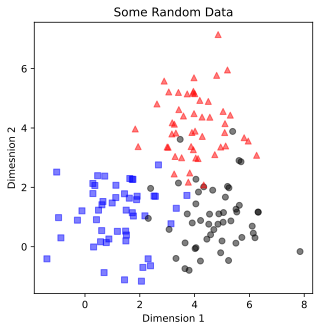

In [38]:
# Check whether the function works
theData = createSomeData(50)

data = theData["data"]
labels = theData["labels"]

# Plot everything
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs", alpha=0.5)
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko", alpha=0.5)
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], "r^", alpha=0.5)
plt.title("Some Random Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimesnion 2")
plt.show()

In [39]:
print(theData.keys())

dict_keys(['data', 'labels', 'train_data', 'test_data'])


In [41]:
# Create a class for the model
def createTheModel(nUnits,nLayers):

    class QwertyNet(nn.Module):
        def __init__(self, nUnits, nLayers):
            super().__init__()

            # Create a dictionary to store the layers
            self.layers = nn.ModuleDict()
            self.nLayers = nLayers

            # Define the input Layer
            self.layers["input"] = nn.Linear(2,nUnits)

            # Define the hidden layers
            for i in range(nLayers):
                self.layers[f"hidden{i}"] = nn.Linear(nUnits, nUnits)

            # Output Layer
            self.layers["output"] = nn.Linear(nUnits,3)

        # Forward Pass
        def forward(self,x):
            
            # Input Layer
            x = self.layers["input"](x)

            # Hidden Layers
            for i in range(self.nLayers):
                x = F.relu(self.layers[f"hidden{i}"](x))
            
            # Output Layer
            x = self.layers["output"](x)
            return x
    
    # Create the model Instance
    net = QwertyNet(nUnits,nLayers)

    # Define the loss function
    lossfun = nn.CrossEntropyLoss()

    # Define the Optimizer
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

    return net, lossfun, optimizer

In [42]:
# Test the model to make sure it is working
nUnitsPerLayer = 12
nLayers = 4

net, lossfun, opt = createTheModel(nUnitsPerLayer, nLayers)
print(net)
input = torch.rand(10,2)
net(input)

QwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


tensor([[ 0.3274, -0.2509,  0.1493],
        [ 0.3266, -0.2522,  0.1491],
        [ 0.3269, -0.2519,  0.1492],
        [ 0.3271, -0.2513,  0.1492],
        [ 0.3268, -0.2523,  0.1490],
        [ 0.3263, -0.2526,  0.1488],
        [ 0.3271, -0.2508,  0.1493],
        [ 0.3262, -0.2535,  0.1501],
        [ 0.3256, -0.2538,  0.1485],
        [ 0.3269, -0.2524,  0.1491]], grad_fn=<AddmmBackward0>)

In [43]:
# Define a function to train the model
def function2TrainTheModel(nUnits,nLayers):

    # Define the number of epochs
    numepochs = 50

    # Create new model
    net, lossfun, optimizer = createTheModel(nUnits, nLayers)

    # Initialize the losses
    losses = np.zeros((numepochs, 2))
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # Initialize batch losses and accuracy
        batchLoss = []
        batchAcc = []

        # Loop over the minibatches
        for X,y in train_data:

            # Forward Pass
            yHat = net(X)
            loss = lossfun(yHat,y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this specific batch
            batchLoss.append(loss.item())

            # Compute batch Accuracy
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
        # End of the batch

        # Train accuracy for one epoch
        trainAcc.append(np.mean(batchAcc))
        losses[epochi,0] = np.mean(batchLoss)

        # Test Accuracy
        X,y = next(iter(test_data))
        with torch.no_grad():
            yHat = net(X)
        
        # Test Accuracy
        testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
        
        # Test Loss
        losses[epochi,1] = lossfun(yHat,y).item()
    # End of epochs

    # Return the model output
    return trainAcc, testAcc, losses, net

In [44]:
# Test the model again to make sure it works
# Generate some random data
theData = createSomeData(200)
train_data = theData["train_data"]
test_data = theData["test_data"]

# Run the model
trainAcc, testAcc, losses, net = function2TrainTheModel(80,1)

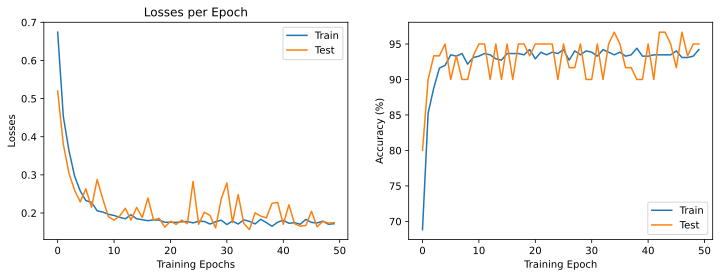

In [45]:
# Plot the whole thing
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(losses)
ax[0].set_ylabel("Losses")
ax[0].set_xlabel("Training Epochs")
ax[0].set_title("Losses per Epoch")
ax[0].legend(["Train", "Test"])

ax[1].plot(trainAcc,label="Train")
ax[1].plot(testAcc, label="Test")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Training Epoch")
ax[1].legend()

plt.show()

In [46]:
# Define metaparameters before running the experiment
nNodesInModel = 80
layersRange = [1,5,10,20]
nDataPoints = np.arange(50,551,50)

# Create a legend for plotting later
legend = []

# Print out model architectures
for lidx,layers in enumerate(layersRange):

    # Create Model
    unitsperlayer = int(nNodesInModel/layersRange[lidx])
    net = createTheModel(unitsperlayer,layers)[0]

    # Count the parameters
    nparams = np.sum([p.numel() for p in net.parameters() if p.requires_grad])

    legend.append("%s layers, %s units, %s params" %(layers, unitsperlayer, nparams))
    print("This model will have %s layers, each with %s units, totalling %s parameters" %(layers, unitsperlayer, nparams))

This model will have 1 layers, each with 80 units, totalling 6963 parameters
This model will have 5 layers, each with 16 units, totalling 1459 parameters
This model will have 10 layers, each with 8 units, totalling 771 parameters
This model will have 20 layers, each with 4 units, totalling 427 parameters


In [47]:
# Initialize the results matrix
results = np.zeros((len(nDataPoints), len(layersRange),2))

for didx,pnts in enumerate(nDataPoints):

    # Create the data
    theData = createSomeData(pnts)
    train_data = theData["train_data"]
    test_data = theData["test_data"]

    # Loop over the layers
    for lidx,layers in enumerate(layersRange):

        unitsperlayer = int(nNodesInModel/layersRange[lidx])
        trainAcc, testAcc, losses, net = function2TrainTheModel(unitsperlayer, layers)

        # Average of the last 5 accuracies and losses
        results[didx,lidx,0] = np.mean(testAcc[-5:])
        results[didx,lidx,1] = np.mean(losses[-5:])

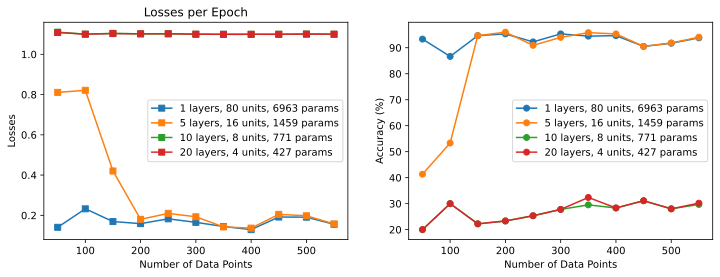

In [48]:
# Plot the whole thing
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(nDataPoints, results[:,:,1], "s-")
ax[0].set_ylabel("Losses")
ax[0].set_xlabel("Number of Data Points")
ax[0].set_title("Losses per Epoch")
ax[0].legend(legend)

ax[1].plot(nDataPoints, results[:,:,0], "o-")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Number of Data Points")
ax[1].legend(legend)

plt.show()
# A wide network performs very well, while very deep network performs horribly
# Hard to predict how the model is going to perform; it depends strongly on the nature of the data

# Code Challenge: Unbalanced Data

Use the wine quality dataset and train a DL model using leaky_relu activation function, Adam optimizer, lr = 0.001 and 500 epochs for training.

Create a python function that will create and expport train/test dataloaders with a specified quality threshold for binarizing bad/good. Use three different thresholds: 4.5, 5.5 and 6.5 and plot the results. 

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep = ";")
# Remove the extreme outliers (as explored many weeks ago)
data = data[data["total sulfur dioxide"]<200]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Z-Score all columns except quality column
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5


In [ ]:
# Write a function to create the dataset we want
def createAdataset(qualThreshold):

    # Create a new column for binarized quality
    data["boolQuality"] = 0

    tmp = (data["quality"] > qualThreshold).astype(int)
    data["boolQuality"] = tmp

    # Convert from pandas dataframe to tensor
    dataT = torch.tensor(data[cols2zscore].values).float()
    labels = torch.tensor(data["boolQuality"].values).float()
    # Turn labels into a matrix
    labels = labels[:,None]

    # Split the data
    train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size=0.1)

    # Convert into PyTorch datasets
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # Translate into dataloader objects
    batchsize = 8
    train_loader = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return train_loader, test_loader

In [ ]:
# Test to see whats going on
train_loader, test_loader = createAdataset(6)

# Get the number of high and low quality wines
qualityRatings = train_loader.dataset.tensors[1].detach()
print("Low-Rated Wines {}".format(torch.sum(qualityRatings==0).item()))
print("High-Quality Wines {}".format(torch.sum(qualityRatings==1).item()))

Low-Rated Wines 1247
High-Quality Wines 190


In [ ]:
# Test to see whats going on: The most ballanced option
train_loader, test_loader = createAdataset(5)

# Get the number of high and low quality wines
qualityRatings = train_loader.dataset.tensors[1].detach()
print("Low-Rated Wines {}".format(torch.sum(qualityRatings==0).item()))
print("High-Quality Wines {}".format(torch.sum(qualityRatings==1).item()))

Low-Rated Wines 681
High-Quality Wines 756


In [ ]:
# Define a class for the model
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        # define the input layer
        self.input = nn.Linear(11,16)

        # Define 2 hidden layers
        self.fc1 = nn.Linear(16,32)
        self.fc2 = nn.Linear(32,32)

        # Define the output layer
        self.output = nn.Linear(32,1)

    # Define the forward pass
    def forward(self,x):
        x = F.leaky_relu(self.input(x))
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        return self.output(x)

In [ ]:
# Define the function to train the model

# Define the number of epochs
numepochs = 500

def trainTheModel():

    # Define loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(winenet.parameters(),lr=0.001)

    # INitialize the losses
    losses = []
    trainAcc = []
    testAcc = []

    # Iterate over the epochs
    for epochi in range(numepochs):

        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward Pass
            yHat = winenet(X)
            loss = lossfun(yHat,y)

            # BackPropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Batch loss and accuracy
            batchLoss.append(loss.item())
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        # End of a batch

        # Train accuracy for this epoch
        trainAcc.append(np.mean(batchAcc))

        # LOsses for this epocj
        losses.append(np.mean(batchLoss))

        # Test
        X,y = next(iter(test_loader))
        with torch.no_grad():
            yHat = winenet(X)
        testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
    # Overall Output
    return trainAcc, testAcc, losses

In [ ]:
# Create the data to test everything is working
train_loader, test_loader = createAdataset(5)

# Create a model and train it
winenet = ANNwine()
trainAcc, testAcc, losses = trainTheModel()

# Compute accuracy per quality type
X,y = next(iter(test_loader))
yHat = winenet(X)
itemAccuracy = ((yHat>0)==y).float()

perQualAcc = [100*torch.mean(itemAccuracy[y==0]),100*torch.mean(itemAccuracy[y==1])]

perQualAcc

[tensor(72.7273), tensor(78.3133)]

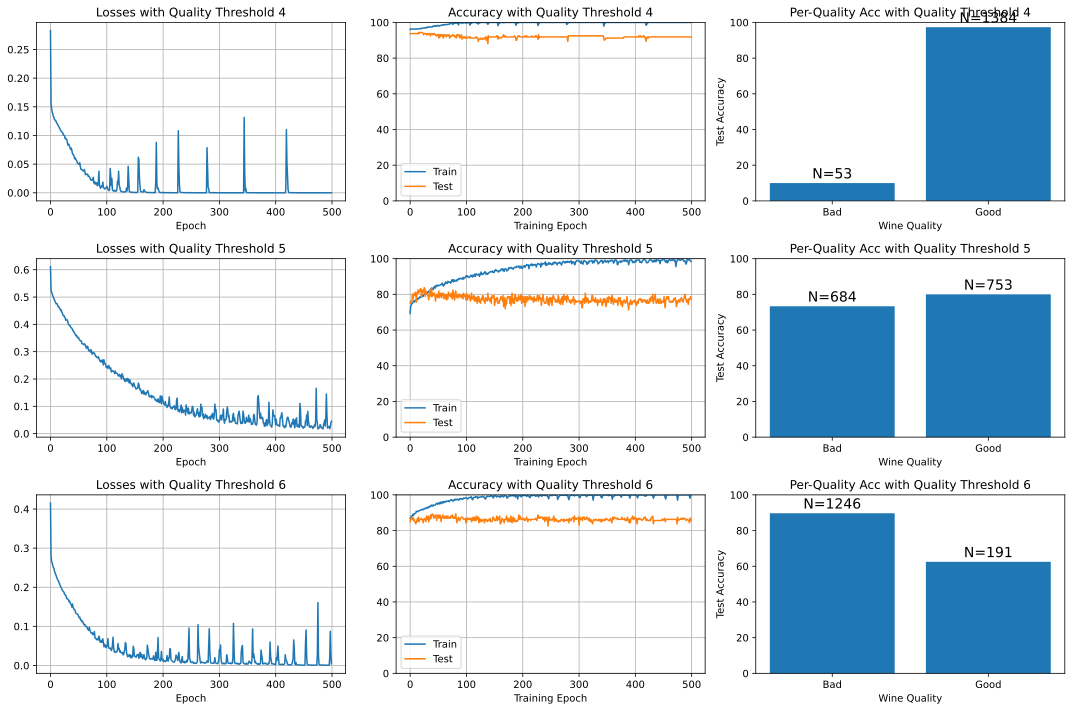

In [ ]:
# Run the Whole Thing

fig,ax = plt.subplots(3,3,figsize=(15,10))

# Quality Thresholds
qualityThresholds = [4,5,6]

# Loop over
for quali in range(len(qualityThresholds)):
    train_loader, test_loader = createAdataset(qualityThresholds[quali])
    winenet = ANNwine()
    trainAcc, testAcc, losses = trainTheModel()

    # Accuracy per quality type
    X,y = next(iter(test_loader))
    yHat = winenet(X)
    itemAccuracy = ((yHat>0)==y).float()
    perQualAcc = [100*torch.mean(itemAccuracy[y==0]),100*torch.mean(itemAccuracy[y==1])]

    # Plot the losses
    ax[quali,0].plot(losses)
    ax[quali,0].set_title("Losses with Quality Threshold {}".format(qualityThresholds[quali]))
    ax[quali,0].set_xlabel("Epoch")
    ax[quali,0].grid()

    # Plot the overall Accuracy
    ax[quali,1].plot(trainAcc, label="Train")
    ax[quali,1].plot(testAcc, label="Test")
    ax[quali,1].set_title("Accuracy with Quality Threshold {}".format(qualityThresholds[quali]))
    ax[quali,1].legend()
    ax[quali,1].set_xlabel("Training Epoch")
    ax[quali,1].set_ylim([0,100])
    ax[quali,1].grid()

    # Plot per-quality Accuracy
    bh = ax[quali,2].bar(["Bad", "Good"],perQualAcc)
    ax[quali,2].set_ylim([0,100])
    ax[quali,2].set_xlabel("Wine Quality")
    ax[quali,2].set_ylabel("Test Accuracy")
    ax[quali,2].set_title("Per-Quality Acc with Quality Threshold {}".format(qualityThresholds[quali]))

    # Print the counts on top of each bar
    for i,r in enumerate(bh):
        N = torch.sum(train_loader.dataset.tensors[1]==i).item()
        ax[quali,2].text(r.get_x()+r.get_width()/2, r.get_height()+1,
                         "N=%s"%N, ha="center", va="bottom", fontsize=14)

plt.tight_layout()
plt.show()

# Data Oversampling in MNIST

We will use the MNIST dataset with various sample sizes from 500 to 4000. Then we will train the model twice, once using unique samples and the second timed by doubling the samples, and then we will discuss the results and what they mean.

In [ ]:
# Import MNIST dataset (it comes with colab)

dataFull = np.loadtxt(open("sample_data/mnist_train_small.csv", "rb"),delimiter=",")

In [ ]:
dataFull.shape

(20000, 785)

In [ ]:
dataFull

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Write a pythton function to create the dataset
def makeTheDataset(N, doubleTheData=False):

    # Extract the labels and remove them from the data (Only N samples)
    labels = dataFull[:N,0]
    data = dataFull[:N,1:]

    # Normalize the data on range 0-1
    dataNorm = data/np.max(data)

    # Make an exact copy of all the data
    if doubleTheData:
        dataNorm = np.concatenate((dataNorm, dataNorm),axis=0)
        labels = np.concatenate((labels, labels),axis=0)

    # Convert into tensor
    dataT = torch.tensor(dataNorm).float()
    labelsT = torch.tensor(labels).long()

    # Use sikit learn to split the data
    train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, train_size=0.9)

    # Make an exact copy of the train data (Not used here, doubles the training data only, not test)
    #if doubleTheData:
    #    train_data = torch.cat((train_data, train_data),axis=0)
    #    train_labels = torch.cat((train_labels, train_labels),axis=0)

    # Convert into Pytorch datasets
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # Translate into DataLoader objects
    batchsize = 20
    train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return train_loader, test_loader

In [ ]:
# Lets test the code
r,t = makeTheDataset(200, False)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)
print()
print("Expecting doubling in size")
r,t = makeTheDataset(200, True)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

torch.Size([180, 784])
torch.Size([20, 784])

Expecting doubling in size
torch.Size([360, 784])
torch.Size([40, 784])


In [ ]:
# Let's create the DL Model
def createTheMNISTNet():

    class MnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            # define the input layer
            self.input = nn.Linear(784,64)

            # define two hidden layers
            self.fc1 = nn.Linear(64,32)
            self.fc2 = nn.Linear(32,32)

            # define the output layer
            self.output = nn.Linear(32,10)

        # Forward Pass
        def forward(self,x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return self.output(x)
        
    # Create a model instance
    net = MnistNet()

    # Define the loss function
    lossfun = nn.CrossEntropyLoss()

    # Define the optimizer
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

    return net, lossfun, optimizer

In [ ]:
# Create a function to train the model
def function2TrainTheModel():

    # Define the number of epochs
    numepochs = 50

    # Create new model
    net, lossfun, optimizer = createTheMNISTNet()

    # Initialize the losses
    losses = np.zeros((numepochs, 2))
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # Initialize batch losses and accuracy
        batchLoss = []
        batchAcc = []

        # Loop over the minibatches
        for X,y in train_data:

            # Forward Pass
            yHat = net(X)
            loss = lossfun(yHat,y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this specific batch
            batchLoss.append(loss.item())

            # Compute batch Accuracy
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
        # End of the batch

        # Train accuracy for one epoch
        trainAcc.append(np.mean(batchAcc))
        losses[epochi,0] = np.mean(batchLoss)

        # Test Accuracy
        X,y = next(iter(test_data))
        with torch.no_grad():
            yHat = net(X)
        
        # Test Accuracy
        testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
        
        # Test Loss
        losses[epochi,1] = lossfun(yHat,y).item()
    # End of epochs

    # Return the model output
    return trainAcc, testAcc, losses, net

In [ ]:
# Run the model once to confirm it works
train_data, test_data = makeTheDataset(5000)

# Test it
trainAcc, testAcc, losses, net = function2TrainTheModel()

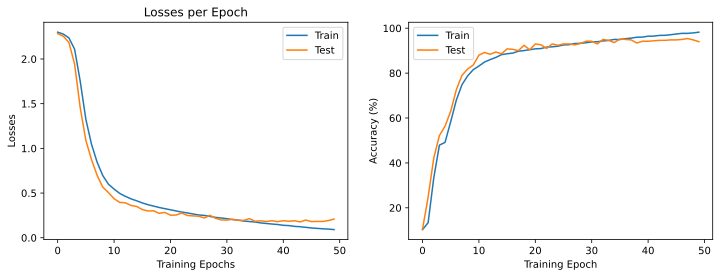

In [ ]:
# Plot the whole thing
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(losses)
ax[0].set_ylabel("Losses")
ax[0].set_xlabel("Training Epochs")
ax[0].set_title("Losses per Epoch")
ax[0].legend(["Train", "Test"])

ax[1].plot(trainAcc,label="Train")
ax[1].plot(testAcc, label="Test")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Training Epoch")
ax[1].legend()

plt.show()

In [ ]:
# Run the experiment with increasing N

# Define the smaple sizes
samplesizes = np.arange(500,4001,500)

# Initialize the results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))

for idx,ssize in enumerate(samplesizes):

    # No data doubling
    # Generate a dataset and train the model
    train_data, test_data = makeTheDataset(ssize,False)
    trainAcc, testAcc, losses, net = function2TrainTheModel()

    # Store the results
    resultsSingle[idx,0] = np.mean(trainAcc[-5:])
    resultsSingle[idx,1] = np.mean(testAcc[-5:])
    resultsSingle[idx,2] = np.mean(losses[-5:])

    # DOuble the results
    train_data, test_data = makeTheDataset(ssize,True)
    trainAcc, testAcc, losses, net = function2TrainTheModel()

    # Store the results
    resultsDouble[idx,0] = np.mean(trainAcc[-5:])
    resultsDouble[idx,1] = np.mean(testAcc[-5:])
    resultsDouble[idx,2] = np.mean(losses[-5:])

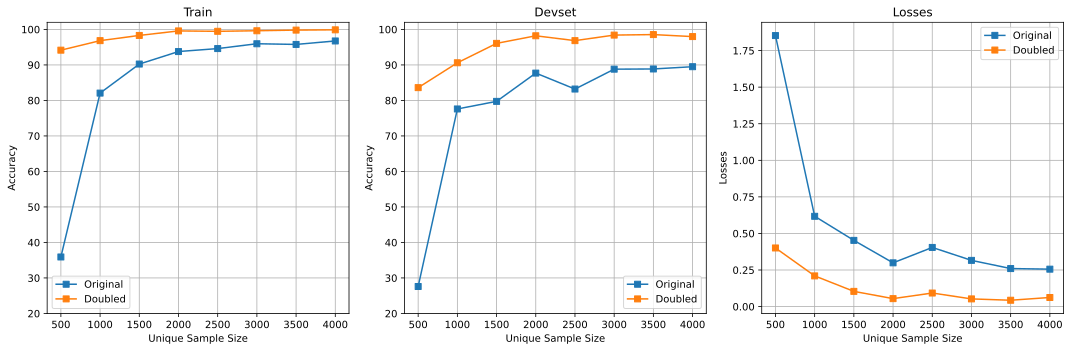

In [ ]:
# Visualize the whole thing
fig,ax = plt.subplots(1,3,figsize=(15,5))

# Axis and title label
titles = ["Train", "Devset", "Losses"]
yaxlabels = ["Accuracy", "Accuracy", "Losses"]

# Common features
for i in range(3):

    # Plot the lines
    ax[i].plot(samplesizes, resultsSingle[:,i],"s-",label="Original")
    ax[i].plot(samplesizes, resultsDouble[:,i],"s-",label="Doubled")

    # Improve the plot
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel("Unique Sample Size")
    ax[i].grid("on")

    if i<2:
        ax[i].set_ylim([20,102])
    
plt.tight_layout()
plt.show()

In [ ]:
# Partition the data before doubling smaple size
def makeTheDataset(N, doubleTheData=False):

    # Extract the labels and remove them from the data (Only N samples)
    labels = dataFull[:N,0]
    data = dataFull[:N,1:]

    # Normalize the data on range 0-1
    dataNorm = data/np.max(data)

    # Make an exact copy of all the data
    #if doubleTheData:
    #    dataNorm = np.concatenate((dataNorm, dataNorm),axis=0)
    #    labels = np.concatenate((labels, labels),axis=0)

    # Convert into tensor
    dataT = torch.tensor(dataNorm).float()
    labelsT = torch.tensor(labels).long()

    # Use sikit learn to split the data
    train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, train_size=0.9)

    # Make an exact copy of the train data (Not used here, doubles the training data only, not test)
    if doubleTheData:
        train_data = torch.cat((train_data, train_data),axis=0)
        train_labels = torch.cat((train_labels, train_labels),axis=0)

    # Convert into Pytorch datasets
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # Translate into DataLoader objects
    batchsize = 20
    train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return train_loader, test_loader

In [ ]:
# Run the experiment with increasing N

# Define the smaple sizes
samplesizes = np.arange(500,4001,500)

# Initialize the results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))

for idx,ssize in enumerate(samplesizes):

    # No data doubling
    # Generate a dataset and train the model
    train_data, test_data = makeTheDataset(ssize,False)
    trainAcc, testAcc, losses, net = function2TrainTheModel()

    # Store the results
    resultsSingle[idx,0] = np.mean(trainAcc[-5:])
    resultsSingle[idx,1] = np.mean(testAcc[-5:])
    resultsSingle[idx,2] = np.mean(losses[-5:])

    # DOuble the results
    train_data, test_data = makeTheDataset(ssize,True)
    trainAcc, testAcc, losses, net = function2TrainTheModel()

    # Store the results
    resultsDouble[idx,0] = np.mean(trainAcc[-5:])
    resultsDouble[idx,1] = np.mean(testAcc[-5:])
    resultsDouble[idx,2] = np.mean(losses[-5:])

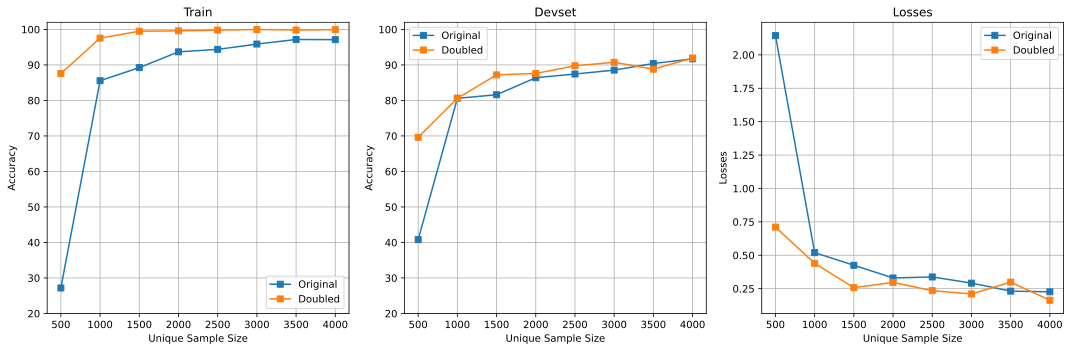

In [ ]:
# Visualize the whole thing
fig,ax = plt.subplots(1,3,figsize=(15,5))

# Axis and title label
titles = ["Train", "Devset", "Losses"]
yaxlabels = ["Accuracy", "Accuracy", "Losses"]

# Common features
for i in range(3):

    # Plot the lines
    ax[i].plot(samplesizes, resultsSingle[:,i],"s-",label="Original")
    ax[i].plot(samplesizes, resultsDouble[:,i],"s-",label="Doubled")

    # Improve the plot
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel("Unique Sample Size")
    ax[i].grid("on")

    if i<2:
        ax[i].set_ylim([20,102])
    
plt.tight_layout()
plt.show()

# Noise Augmentation

In [ ]:
# Import the MNIST dataset from colab

dataFull = np.loadtxt(open("sample_data/mnist_train_small.csv", "rb"),delimiter = ",")

dataFull[:,1:] = dataFull[:,1:]/np.max(dataFull)
dataFull

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Write a function to return a dataset of a specific size

def makeTheDataset(N, doubleTheData=False):

    # Extract the labels as separate data
    data = dataFull[:N,1:]
    labels = dataFull[:N,0]

    # Make a noisy copy of ALL the data
    if doubleTheData:
        dataN = data + np.random.random_sample(data.shape)/2
        # renormalize the data since it may exceed the 0-1 range
        # dataN = dataN/np.max(dataN)
        data = np.concatenate((data,dataN),axis=0)
        labels = np.concatenate((labels,labels),axis=0)

    # Convert to tensor
    dataT = torch.tensor(data).float()
    labelsT = torch.tensor(labels).long()

    # Split the data into training and testing set
    train_data, devset_data, train_labels, devset_labels = train_test_split(dataT, labelsT, train_size=0.9)

    # # Make a noisy copy of the training data as we did before
    # if doubleTheData:
    #     train_dataN = train_data + torch.rand_like(train_data)/2
    #     # renormalize the data since it may exceed the 0-1 range
    #     # train_dataN = dataN/torch.max(dataN)
    #     train_data = torch.cat((train_data,train_dataN),axis=0)
    #     train_labels = torch.cat((train_labels,train_labels),axis=0)

    # Convert into Pytorch datasets
    train_data = TensorDataset(train_data, train_labels)
    devset_data = TensorDataset(devset_data, devset_labels)

    # Translate into DataLoader Objects
    batchsize = 20
    train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last = True)
    devset_loader = DataLoader(devset_data, batch_size=devset_data.tensors[0].shape[0])

    # Create a test set (No need for DataLoader)
    test_data = torch.tensor(dataFull[N:,1:]).float()
    test_labels = torch.tensor(dataFull[N:,0]).long()

    return train_loader, devset_loader, (test_data, test_labels)

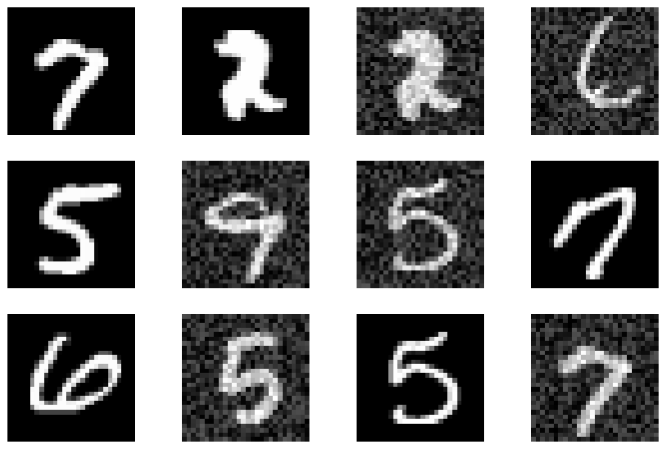

In [ ]:
# Sanity Check
train_loader, devset_loader, testdataset = makeTheDataset(12,True)

img = train_loader.dataset.tensors[0].detach()

# Show the numbers
fig,ax = plt.subplots(3,4,figsize=(12,8))
for i,ax in enumerate(ax.flatten()):
    ax.imshow(np.reshape(img[i,:],(28,28)), cmap="gray")
    ax.axis("off")
plt.show()

In [ ]:
train_loader.dataset.tensors[0].shape

torch.Size([21, 784])

In [ ]:
devset_loader.dataset.tensors[0].shape

torch.Size([3, 784])

In [ ]:
for i in testdataset:
    print(i.shape)

torch.Size([19988, 784])
torch.Size([19988])


In [ ]:
20000-12

19988

In [ ]:
# Create a class for the model
def createTheMNISTNet():

    class MnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            # Define the input layer
            self.input = nn.Linear(784,64)

            # Define 2 hidden layers
            self.fc1 = nn.Linear(64,32)
            self.fc2 = nn.Linear(32,32)

            # Output Layer
            self.output = nn.Linear(32,10)

        # Define Forward Pass
        def forward(self,x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return self.output(x)
    
    # Create a model instance
    net = MnistNet()

    # Define loss function
    lossfun = nn.CrossEntropyLoss()

    # Define the optimization technique
    optimizer = torch.optim.SGD(net.parameters(),lr = 0.01)

    return net, lossfun, optimizer

In [ ]:
# Create a function to train the model
def function2TrainTheModel():

    # define the number of epochs
    numepochs = 50

    # Create a new model
    net, lossfun, optimizer = createTheMNISTNet()

    # Initialize the losses
    losses = np.zeros((numepochs,2))
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # Store the results of training batches
        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward pass
            yHat = net(X)
            loss = lossfun(yHat,y)

            # BackPropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Batch loss from this particular batch
            batchLoss.append(loss.item())

            # Particular batch Accuracy
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))
        # End of the batch

        # Calculate the training accuracy for one epoch
        trainAcc.append(np.mean(batchAcc))
        losses[epochi,0] = np.mean(batchLoss)

        # Devset Accuracy
        X,y = next(iter(devset_loader))
        with torch.no_grad():
            yHat = net(X)

        # Devset Accuracy
        testAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()))

        # Store devset losses for this epoch
        losses[epochi,1] = lossfun(yHat,y).item()
    # End of epochs
    return trainAcc, testAcc, losses, net

In [ ]:
# Run the model once to confirm it works
train_loader, devset_loader, testdataset = makeTheDataset(5000)

# Test it
trainAcc, testAcc, losses, net = function2TrainTheModel()

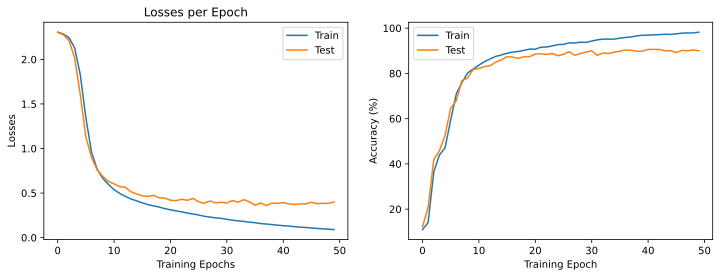

In [ ]:
# Plot the whole thing
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(losses)
ax[0].set_ylabel("Losses")
ax[0].set_xlabel("Training Epochs")
ax[0].set_title("Losses per Epoch")
ax[0].legend(["Train", "Test"])

ax[1].plot(trainAcc,label="Train")
ax[1].plot(testAcc, label="Test")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Training Epoch")
ax[1].legend()

plt.show()

In [ ]:
# Run the Experiment
samplesizes = np.arange(500,4001,500)

# Initialize the results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))

for idx,ssize in enumerate(samplesizes):

    # No data doubling
    # Generate a dataset and train the model
    train_loader, devset_loader, testdataset = makeTheDataset(ssize,False)
    trainAcc, testAcc, losses, net = function2TrainTheModel()

    # Store the results
    resultsSingle[idx,0] = np.mean(trainAcc[-5:])
    resultsSingle[idx,1] = np.mean(testAcc[-5:])
    resultsSingle[idx,2] = np.mean(losses[-5:])

    # DOuble the results
    train_loader, devset_loader, testdataser = makeTheDataset(ssize,True)
    trainAcc, testAcc, losses, net = function2TrainTheModel()

    # Store the results
    resultsDouble[idx,0] = np.mean(trainAcc[-5:])
    resultsDouble[idx,1] = np.mean(testAcc[-5:])
    resultsDouble[idx,2] = np.mean(losses[-5:])

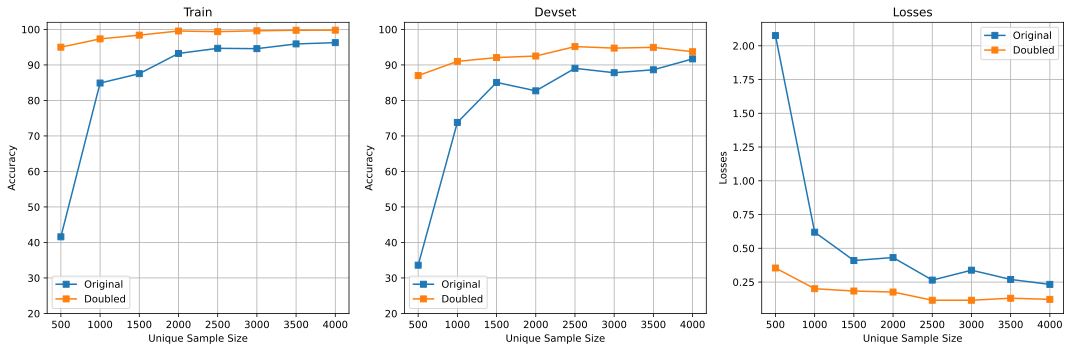

In [ ]:
# Visualize the whole thing
fig,ax = plt.subplots(1,3,figsize=(15,5))

# Axis and title label
titles = ["Train", "Devset", "Losses"]
yaxlabels = ["Accuracy", "Accuracy", "Losses"]

# Common features
for i in range(3):

    # Plot the lines
    ax[i].plot(samplesizes, resultsSingle[:,i],"s-",label="Original")
    ax[i].plot(samplesizes, resultsDouble[:,i],"s-",label="Doubled")

    # Improve the plot
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel("Unique Sample Size")
    ax[i].grid("on")

    if i<2:
        ax[i].set_ylim([20,102])
    
plt.tight_layout()
plt.show()
# THis time devset accuracy became lower because of noise introduced into the data

In [ ]:
# Test for accuracy
samplesize = 500

train_loader, devset_loader, testdataset = makeTheDataset(samplesize, False)
# Original, non-Augmented Data (O = original)
trainAccO, devsetAccO, lossesO, netO = function2TrainTheModel()

train_loader, devset_loader, testdataset = makeTheDataset(samplesize, True)
# Augmented Data
trainAccA, devsetAccA, lossesA, netA = function2TrainTheModel()

In [ ]:
# Extract the test data
X,y = testdataset

# Run the original model
yHat = netO(X)
testO = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# Run the augmented model
yHat = netA(X)
testA = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# Print the results
print(f"Original Model (N={samplesize}):\n Train: {trainAccO[-1]:.2f}%, Devset: {devsetAccO[-1]:.2f}%, Test: {testO:.2f}%")
print()
print(f"Augmented Model (N={samplesize}):\n Train: {trainAccA[-1]:.2f}%, Devset: {devsetAccA[-1]:.2f}%, Test: {testA:.2f}%")

Original Model (N=500):
 Train: 51.59%, Devset: 52.00%, Test: 49.63%

Augmented Model (N=500):
 Train: 90.89%, Devset: 88.00%, Test: 79.45%
